### Loading Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Function to the dataset
##### ( as our dataset consists of many jpg files we need to load each image using cv2 and append the labels to the images for all further use) 

In [2]:
# Function to load Simpsons dataset
# this function loads each images one by one and returns the array of the arrays of each image
def load_simpsons_dataset(dataset_path):
    images = []
    labels = []
    label_map = {}
    num_labels = 0

    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(".jpg"):
                # Load image
                image_path = os.path.join(root, file)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                image = cv2.resize(image, (100, 100))  # Resize image if needed

                # Extract label from directory name
                label = os.path.basename(root)
                if label not in label_map:
                    label_map[label] = num_labels
                    num_labels += 1
                label_id = label_map[label]

                # Append image and label to lists
                images.append(image)
                labels.append(label_id)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels, label_map

### Loading the dataset

In [3]:
dataset_path = "C:\\Users\\chait\\Downloads\\archive (2)\\simpsons_dataset"
X, y, label_map = load_simpsons_dataset(dataset_path)

In [4]:
print(X)

[[[[ 90 107 161]
   [ 96 113 167]
   [ 96 113 167]
   ...
   [140 147 175]
   [140 147 175]
   [140 147 175]]

  [[ 90 107 161]
   [ 96 113 167]
   [ 96 113 167]
   ...
   [140 147 175]
   [140 147 175]
   [140 147 175]]

  [[ 90 107 161]
   [ 96 113 167]
   [ 96 113 167]
   ...
   [140 147 175]
   [140 147 175]
   [140 147 175]]

  ...

  [[179 191 188]
   [184 192 214]
   [191 193 241]
   ...
   [212 178  19]
   [116  93  14]
   [147 134 147]]

  [[117 131 107]
   [172 182 180]
   [183 190 216]
   ...
   [212 178  20]
   [158 135  56]
   [144 134 142]]

  [[ 77  95  49]
   [139 151 129]
   [180 193 201]
   ...
   [211 177  19]
   [156 132  54]
   [ 96  84  96]]]


 [[[ 91  65 112]
   [ 91  65 112]
   [ 91  65 112]
   ...
   [145  82  99]
   [139  76  93]
   [133  70  87]]

  [[102  76 123]
   [102  76 123]
   [102  76 123]
   ...
   [146  83 100]
   [136  75  91]
   [127  66  82]]

  [[ 99  73 120]
   [ 99  73 120]
   [ 99  73 120]
   ...
   [126  62  79]
   [129  66  83]
   [134  70

### Splitting dataset into test,train

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Fitting knn model to the train set

In [6]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train.reshape(len(X_train), -1), y_train)

KNeighborsClassifier()

### Fitting random forest ml model to train test

In [7]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train.reshape(len(X_train), -1), y_train)

RandomForestClassifier(random_state=42)

### Checking accuracy of both models 

In [8]:
knn_accuracy = accuracy_score(y_test, knn_classifier.predict(X_test.reshape(len(X_test), -1)))
rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test.reshape(len(X_test), -1)))

In [9]:
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy)
print("Random Forest Classifier Accuracy:", rf_accuracy)

K-Nearest Neighbors Classifier Accuracy: 0.5710532600907571
Random Forest Classifier Accuracy: 0.9269166467637927


### Choosing random image to use as instance for prediction

In [10]:
random_index = np.random.randint(len(X_test))
random_image = X_test[random_index]
random_label = y_test[random_index]

True Character Label: krusty_the_clown


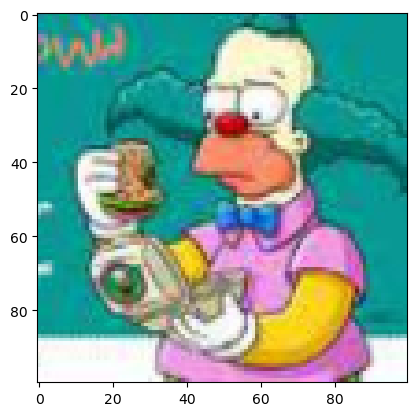

In [11]:
import matplotlib.pyplot as plt
plt.imshow(random_image)
print('True Character Label:', list(label_map.keys())[random_label])

### Making predctions

In [12]:
predicted_character_knn = list(label_map.keys())[list(label_map.values()).index(knn_classifier.predict(random_image.reshape(1, -1))[0])]
predicted_character_rf = list(label_map.keys())[list(label_map.values()).index(rf_classifier.predict(random_image.reshape(1, -1))[0])]
print("True Character Label:", list(label_map.keys())[random_label])
print("Predicted Character (KNN):", predicted_character_knn)
print("Predicted Character (Random Forest):", predicted_character_rf)

True Character Label: krusty_the_clown
Predicted Character (KNN): charles_montgomery_burns
Predicted Character (Random Forest): krusty_the_clown
